## Dimensionality reduction

We will test some of the dimensionality reduction techniques on the [UFO dataset](https://drive.google.com/file/d/0B2gZvn36c5CmRTJpS3pkUllmX1U/view?usp=sharing) from the last week.




### PCA

Subset all **weather related** features from the data and run PCA over it. 


1. Extract the 2 best principal components (k=2). 
1. Plot the **feature** space into the new space. 
    - We should create a scatter plot with 1st component on the axis x and second component on y. 
    - The length of each component is equal to number of columns (features) we have in our data before PCA.
    - Points in the graph that are close to each other are similar features. We need to anotate the points with feature names.
1. Observe which features have similar meaning and which have opposite.
    - Features close to each other have similar meaning.
1. Select the optimal number of dimensions to keep - *k* (find the explained variance of each component and use the elbow rule)
1. Create a projection of your data into the *k* axes of the trained PCA
1. Export the data with the new features. Number of rows should be the same as in the original dataset.

In [91]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv('UFO_data.csv', sep=';')

/home/hafsa/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20,23,26,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [126]:
new_df = df[[
    'cloudCover', 'dewPoint', 'humidity',
    'precipIntensity', 'precipProbability', 'precipType', 'pressure', 'temperature',
    'windSpeed'
]]

In [ ]:
apparentTemperature = median
cloudCover = median
dewPoint = median
humidity = median
percipType = empty
pressure = median
summary = empty
temperature = median
windBearing = median
windSpeed = median

In [127]:
new_df.head()

,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,windSpeed
0,0.00,20.56,0.73,0.0,0.0,NaN,1009.05,25.86,4.89
1,0.00,21.72,0.77,0.0,0.0,NaN,1008.81,26.12,6.60
2,0.75,12.86,0.84,NaN,NaN,rain,1019.00,15.56,NaN
3,0.12,17.04,0.71,NaN,NaN,rain,1020.64,22.68,2.75
4,0.63,21.47,0.77,NaN,NaN,rain,1015.33,25.74,3.60


In [129]:
new_df.dtypes

cloudCover           float64
dewPoint             float64
humidity             float64
precipIntensity      float64
precipProbability    float64
precipType            object
pressure             float64
temperature          float64
windSpeed            float64
dtype: object

In [130]:
#data cleanup

#cloud cover
new_df.loc[
        new_df[
            new_df['cloudCover'].isnull()
        ].index,
        'cloudCover'
] = 0.0

#dew Point
new_df.loc[
        new_df[
            new_df['dewPoint'].isnull()
        ].index,
        'dewPoint'
] = new_df['dewPoint'].mean()

#humidity
new_df.loc[
        new_df[
            new_df['humidity'].isnull()
        ].index,
        'humidity'
] = new_df['humidity'].mean()

#precipIntensity
new_df.loc[
        new_df[
            new_df['precipIntensity'].isnull()
        ].index,
        'precipIntensity'
] = new_df['precipIntensity'].median()

#precipProbability
new_df.loc[
        new_df[
            new_df['precipProbability'].isnull()
        ].index,
        'precipProbability'
] = new_df['precipProbability'].median()

#precipType
new_df['precipType'].replace({
    np.nan: 0,
    'rain': 1,
    'snow': 2
}, inplace=True)

#pressure
new_df.loc[
        new_df[
            new_df['pressure'].isnull()
        ].index,
        'pressure'
] = new_df['pressure'].median()

#temperature
new_df.loc[
        new_df[
            new_df['temperature'].isnull()
        ].index,
        'temperature'
] = new_df['temperature'].median()

#windSpeed
new_df.loc[
        new_df[
            new_df['windSpeed'].isnull()
        ].index,
        'windSpeed'
] = new_df['windSpeed'].median()

/home/hafsa/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hafsa/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [132]:
new_df.isnull().sum()

cloudCover           0
dewPoint             0
humidity             0
precipIntensity      0
precipProbability    0
precipType           0
pressure             0
temperature          0
windSpeed            0
dtype: int64

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = scaler.transform(new_df)

In [138]:
scaled_df_pd = pd.DataFrame(scaled_df)

In [136]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=2)
pca.fit(scaled_df_pd)
pca_df = pca.transform(scaled_df_pd)

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Text(0, 0.5, '% Cumulative explained variance')

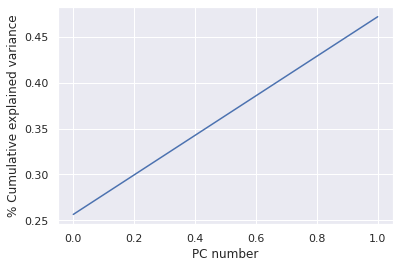

In [142]:
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')